In [1]:
#crashes.groupby(['year']).describe()
# crashes.month.value_counts().sort_values()
#plt.hist(crashes.month, bins=12)

import plotly 
plotly.tools.set_credentials_file(username='dantzelevitch', api_key='PJgrq35QH890fKSDKw0A')
import plotly.plotly as py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy



pd.options.display.max_rows = 500

In [2]:
scores_individual = pd.read_table('Physician_Compare_2015_Individual_EP_Public_Reporting___Performance_Scores.csv', delimiter=',')
scores_group = pd.read_table('Physician_Compare_2015_Group_Public_Reporting___Performance_Scores.csv', delimiter=',')
patient = pd.read_table('Physician_Compare_2015_Group_Public_Reporting_-_Patient_Experience.csv', delimiter=',')
categories = pd.read_table('categories.txt')


#Merge Data

#Flag scores as Individual or Group
scores_individual['isGroup'] = 'Individual'
scores_group['isGroup'] = 'Group'

#Change header on Group dataFrame to match Individual DataFrame
scores_group.rename(columns={'Group PAC ID' : 'PAC ID'}, inplace=True)

#Merge Individual and Group Scores into single dataframe
scores_merged = pd.merge(scores_group, scores_individual, how='outer')
scores_merged = pd.merge(scores_merged, categories, how='left', on='Measure Identifier')

#Update Measures where Inverse = Y
scores_merged.loc[scores_merged['Inverse Measure'] == 'Y' , 'Measure Performance Rate'] =  100 - scores_merged['Measure Performance Rate']



#Aggregate Patient Scores by Group Provider
patient_score_by_group = patient.groupby(['Group PAC ID']).mean()    #,'Measure Title'])
patient_score_by_group.rename(columns={'Measure Performance Rate' : 'Patient Satisfaction'}, inplace=True)
patient_score_by_group = patient_score_by_group.drop(['Footnote'], axis=1)

#Aggregate Provider Scores by Group Provider
provider_score_by_group = scores_merged.groupby(['PAC ID']).mean()    #,'Measure Title'])
provider_score_by_group = provider_score_by_group.drop(['Footnote'], axis=1)
provider_score_by_group = provider_score_by_group.drop(['NPI'], axis=1)


#Merge Provider Scores and Patient Scores by Group
scores_by_group = pd.merge(provider_score_by_group, patient_score_by_group, how='inner', left_index=True, right_index=True)

scores_merged['PAC ID'] = scores_merged['PAC ID'].apply(str)
scores_merged = scores_merged.drop(['Footnote','NPI','Reported on PC Live Site'], axis=1)



scores_merged.head()


,Organization legal name or 'doing business as' name,PAC ID,State,Participating in PQRS,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Reporting Mechanism,isGroup,Last Name,First Name,Category,Type
0,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_131_1,Pain Assessment and Follow-Up,N,99.0,REG,Group,NaN,NaN,Bones,Assessment
1,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_154_1,Falls: Risk Assessment,N,77.0,REG,Group,NaN,NaN,Falls,Assessment
2,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_155_1,Falls: Plan of Care,N,88.0,REG,Group,NaN,NaN,Falls,Treatment
3,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_182_1,Functional Outcome Assessment,N,100.0,REG,Group,NaN,NaN,Preventative Care,Assessment
4,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_110_1,Preventive Care and Screening: Influenza Immun...,N,62.0,WI,Group,NaN,NaN,Flu,Screening


QCDR - A Qualified Clinical Data Registry - an entity Fed Gov. approve that collects clinicians’ clinical data for submission into Incentive Program

REG - Clinical registries are organized systems that use observational study methods to collect uniform data to evaluate specified outcomes for a population defined by a particular disease, condition, or exposure, and that serve one or more scientific, clinical, or policy purposes.

CLM - Claims

In [3]:
df_category = scores_merged.groupby(['Category'])['Measure Performance Rate'].describe()   #.sort_values(ascending = False)
df_category.sort_values(by=['mean'], ascending=False)



,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Eyes,21660.0,95.145152,15.976612,0.0,100.0,100.0,100.0,100.0
Surgery,34581.0,95.024753,11.999818,0.0,96.0,100.0,100.0,100.0
Colon,4895.0,93.943207,12.676576,0.0,95.0,99.0,100.0,100.0
Other,2249.0,92.453535,16.067797,0.0,93.0,98.0,100.0,100.0
Preventative Care,111214.0,90.605185,23.066667,0.0,96.0,100.0,100.0,100.0
Falls,6790.0,88.452135,25.888848,0.0,95.0,100.0,100.0,100.0
Radiology,29220.0,88.335113,22.169969,0.0,89.0,98.0,100.0,100.0
Heart,3014.0,86.628401,23.308561,0.0,84.0,98.0,100.0,100.0
Blood Clots,2673.0,84.026188,27.548366,0.0,81.0,100.0,100.0,100.0


Text(0.5,1,'Categories with higher means have less variability')

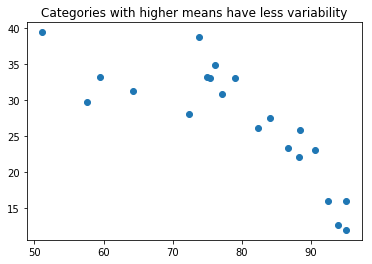

In [4]:
plt.scatter(df_category['mean'],df_category['std'])
plt.title("Categories with higher means have less variability")

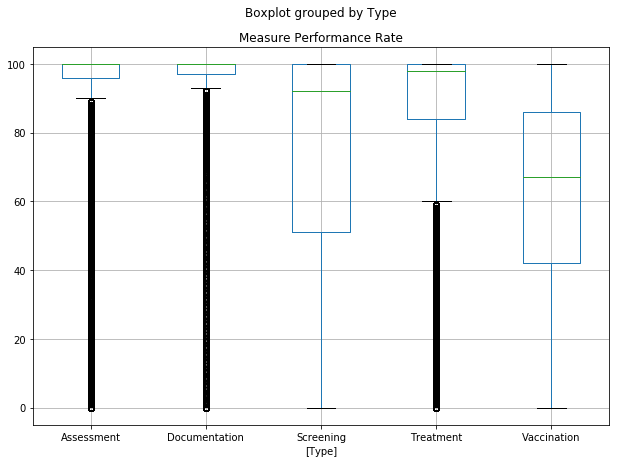

In [5]:
df_category = scores_merged.groupby(['Type'])['Measure Performance Rate'].describe()   #.sort_values(ascending = False)
df_category.sort_values(by=['mean'], ascending=False)
scores_merged.boxplot(['Measure Performance Rate'], by=['Type'], figsize=[10,7], )

In [6]:
df_category = scores_merged.groupby(['State'])['Measure Performance Rate'].describe()   #.sort_values(ascending = False)
df_category.sort_values(by=['mean'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
PR,1.0,100.000000,NaN,100.0,100.00,100.0,100.00,100.0
VT,18.0,93.555556,8.658367,75.0,91.00,98.0,100.00,100.0
DC,6.0,92.666667,6.501282,83.0,90.25,91.5,98.00,100.0
WY,44.0,88.318182,18.390813,6.0,82.75,96.5,100.00,100.0
MA,162.0,86.000000,17.880903,14.0,81.00,93.0,100.00,100.0
LA,244.0,82.069672,27.840508,0.0,74.00,98.0,100.00,100.0
ND,56.0,81.767857,19.748409,25.0,70.75,87.5,99.25,100.0
MT,88.0,81.556818,19.237689,25.0,70.00,86.5,99.25,100.0
NY,830.0,81.542169,23.126443,1.0,73.00,90.0,100.00,100.0


In [7]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_category.index,
        z = df_category['mean'].astype(float),
        locationmode = 'USA-states',
        text = df_category.index,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Measure Performance Rating")
        ) ]

layout = dict(
        title = 'Physician Measure Performance Rating by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    

fig = dict( data=data, layout=layout )
py.iplot(fig, filename='d3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dantzelevitch/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


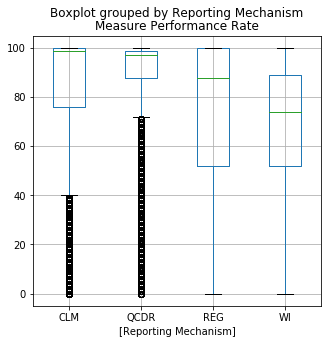

In [8]:
df_category = scores_merged.groupby(['Reporting Mechanism'])['Measure Performance Rate'].describe()   #.sort_values(ascending = False)
df_category.sort_values(by=['mean'], ascending=False)
scores_merged.boxplot(['Measure Performance Rate'], by=['Reporting Mechanism'], figsize=[5,5], )

count    506088.00000
mean         81.41889
std          28.79757
min           0.00000
25%          72.00000
50%          98.00000
75%         100.00000
max         100.00000
Name: Measure Performance Rate, dtype: float64

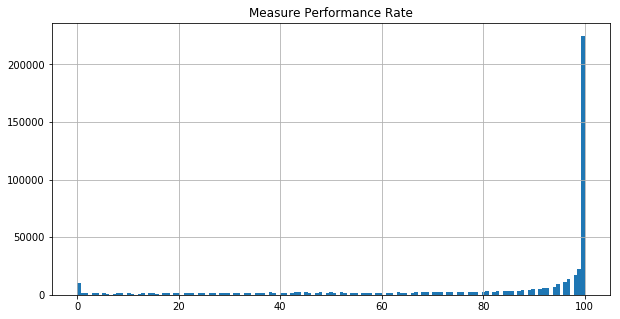

In [9]:
scores_merged = scores_merged.dropna(subset = ['Measure Performance Rate'])


scores_merged.hist(column='Measure Performance Rate', bins="auto", figsize=[10,5])

#scores_merged.boxplot(column='Measure Performance Rate')

scores_merged['Measure Performance Rate'].describe()

In [10]:
from scipy import stats
print(stats.ttest_1samp(scores_merged['Measure Performance Rate'], popmean=30, axis=0))

Ttest_1sampResult(statistic=1270.2227004598583, pvalue=0.0)


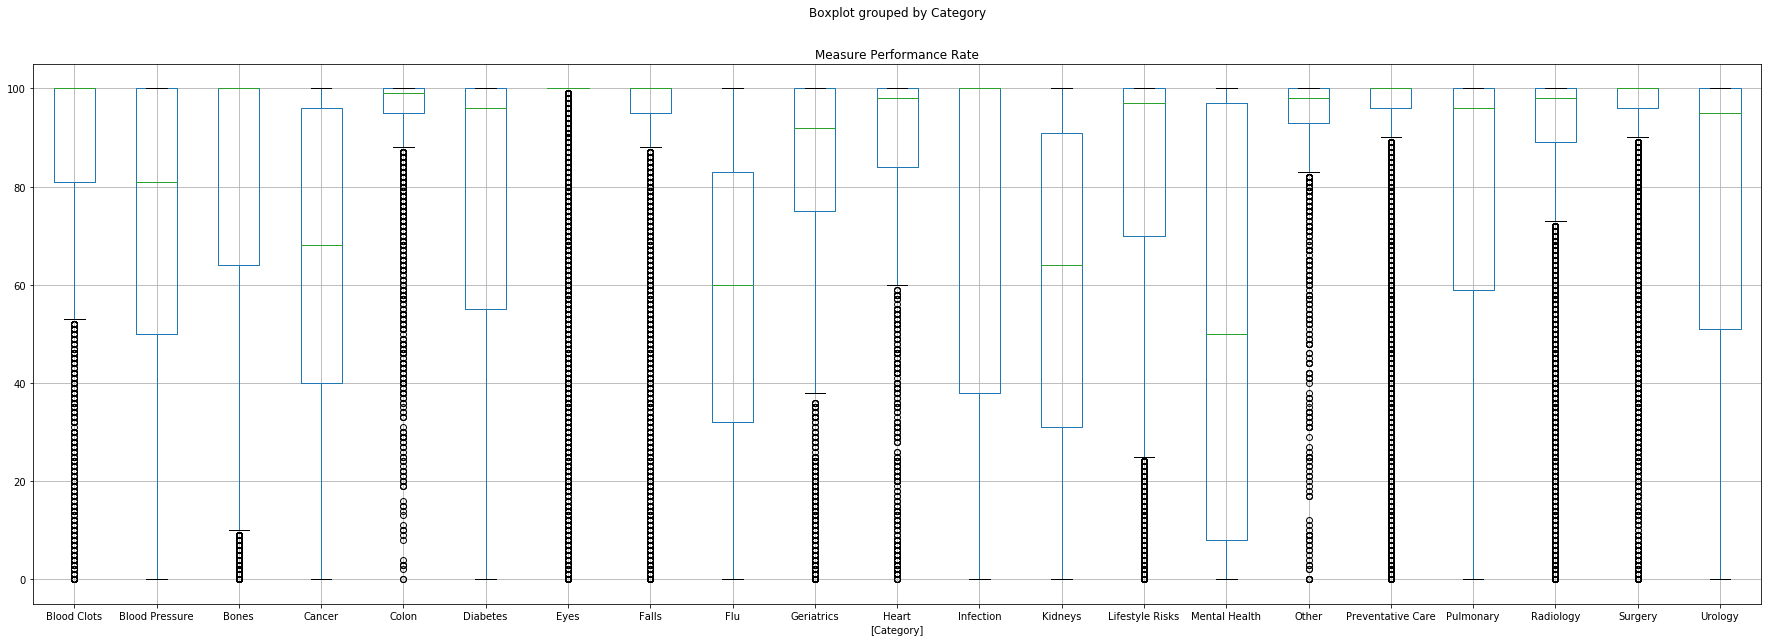

In [11]:
scores_merged.boxplot(['Measure Performance Rate'], by=['Category'], figsize=[30,10], )

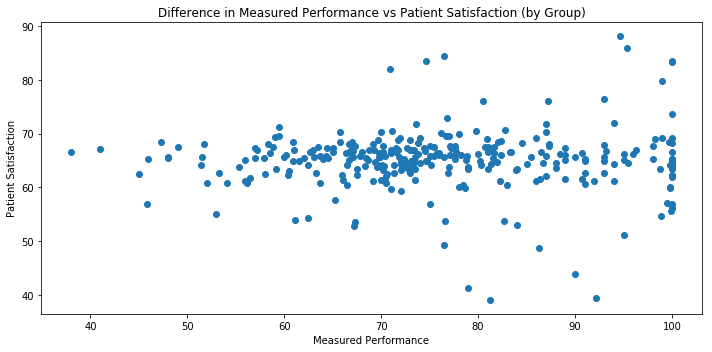

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
plt.scatter(x=scores_by_group['Measure Performance Rate'],y=scores_by_group['Patient Satisfaction'])
plt.title('Difference in Measured Performance vs Patient Satisfaction (by Group)')
plt.xlabel('Measured Performance')
plt.ylabel('Patient Satisfaction')

plt.tight_layout()
plt.show()

In [13]:

patient.groupby(by=patient[' State'])
df_category = patient.groupby(patient[' State'])['Measure Performance Rate'].describe()   #.sort_values(ascending = False)


In [14]:
#df_category = patient.groupby(['State'])['Measure Performance Rate'].describe()   #.sort_values(ascending = False)



scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_category.index,
        z = df_category['mean'].astype(float),
        locationmode = 'USA-states',
        text = df_category.index,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Measure Performance Rating")
        ) ]

layout = dict(
        title = 'Patient Satisfaction Rating by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    

fig = dict( data=data, layout=layout )
py.iplot(fig, filename='d3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dantzelevitch/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [15]:
df_category = patient.groupby(["Measure Title"])['Measure Performance Rate'].describe()

df_category.sort_values(['mean'], ascending = False)

,count,mean,std,min,25%,50%,75%,max
Measure Title,,,,,,,,
How well clinicians communicate.,363.0,82.815427,3.272451,69.0,81.0,83.0,85.0,93.0
Courteous and helpful office staff.,395.0,81.602532,4.403678,64.0,79.0,82.0,85.0,95.0
Patients' rating of clinicians.,379.0,80.527704,4.326753,63.0,78.0,81.0,83.0,92.0
Clinicians working together for your care.,395.0,75.205063,3.488338,61.0,73.0,75.0,77.0,88.0
Health promotion and education.,408.0,60.083333,4.703798,46.0,57.0,61.0,63.0,73.0
"Getting timely care, appointments, and information.",390.0,59.346154,6.482381,34.0,56.0,60.0,63.0,82.0
Between visit communication.,395.0,58.007595,7.420471,35.0,53.0,58.0,63.0,87.0
Attention to patient medication cost.,396.0,26.378788,5.250963,6.0,23.0,26.0,30.0,43.0


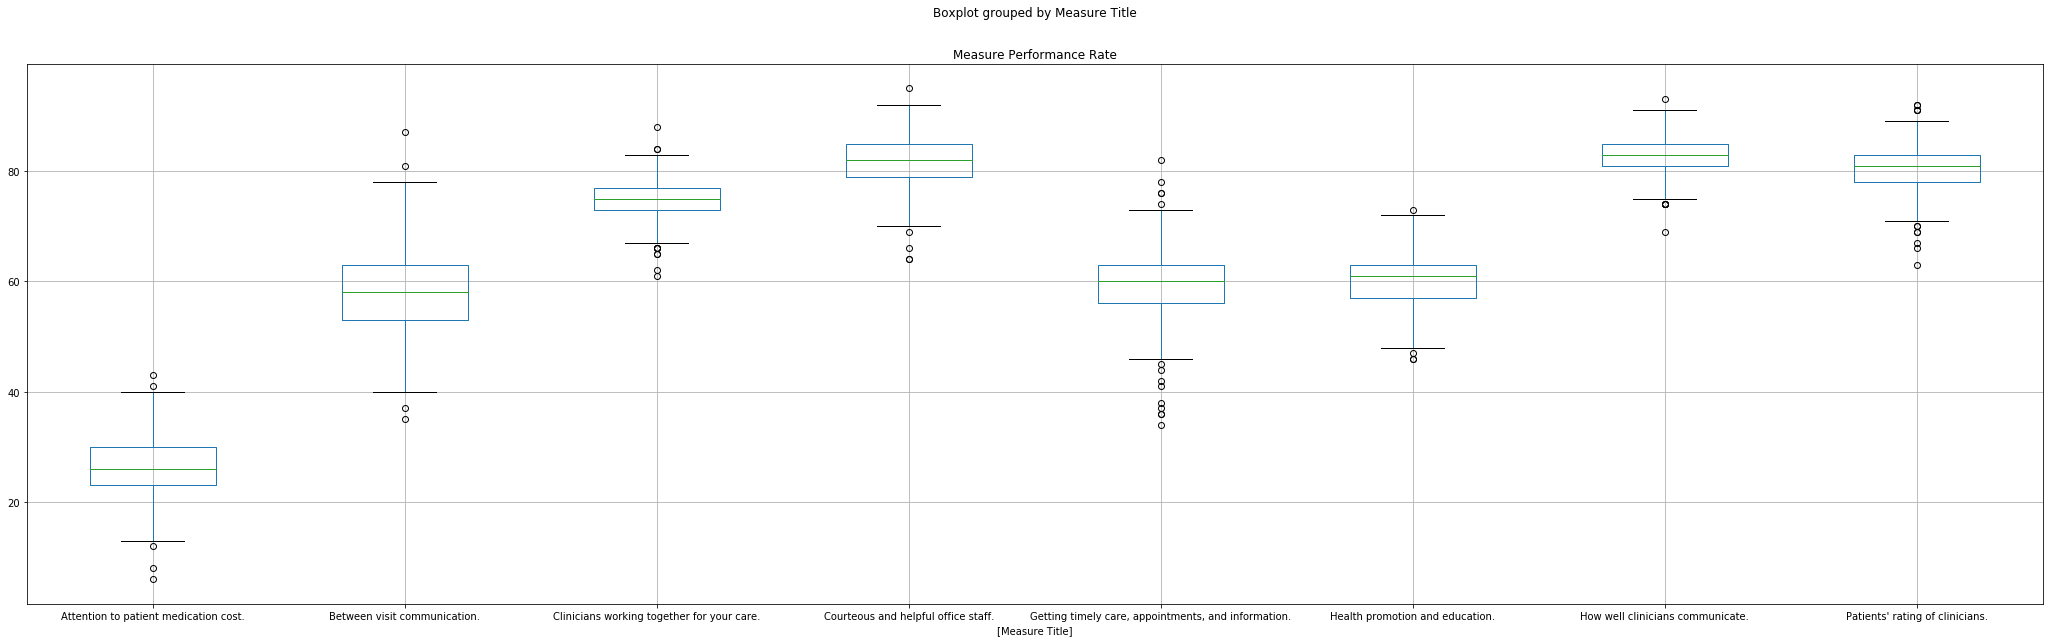

In [16]:
patient.boxplot(['Measure Performance Rate'], by=['Measure Title'], figsize=[35,10])